In [7]:
import cv2  # OpenCV library ko import kar rahe hain jo image processing ke liye use hoti hai
import numpy as np  # NumPy library ko import kar rahe hain jo numerical computations aur array manipulations ke liye use hoti hai
import matplotlib.pyplot as plt  # Matplotlib ka pyplot module import kar rahe hain jo images aur graphs visualize karne ke liye use hota hai


In [8]:
# Image ko load kar rahe hain
image = cv2.imread('img1.jpg')  

# OpenCV default BGR format me image load karta hai, isliye usse RGB me convert kar rahe hain
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  


In [9]:
# Image ko 2D array me reshape kar rahe hain jisme har pixel ka ek RGB triplet hoga
pixel_values = image.reshape((-1, 3))  

# Pixel values ko float32 format me convert kar rahe hain kyunki OpenCV ke k-means algorithm me float format required hota hai
pixel_values = np.float32(pixel_values)  


In [11]:
# K-Means algorithm ke termination criteria define kar rahe hain
# TERM_CRITERIA_EPS: Algorithm tab stop hoga jab accuracy threshold reach ho jaye
# TERM_CRITERIA_MAX_ITER: Algorithm maximum 100 iterations tak chalega
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Clusters ki sankhya define kar rahe hain (Yahan 3 clusters lenge)
k = 3  

# K-Means clustering apply kar rahe hain
# pixel_values: Input data (image ke pixels)
# k: Number of clusters
# None: K-Means ke liye koi predefined labels nahi de rahe hain
# criteria: Stopping criteria jo humne define kiya hai
# 10: Algorithm ko 10 baar run karke best clustering result choose karega
# KMEANS_RANDOM_CENTERS: Cluster centers random initialize honge
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)  


In [12]:
# Cluster centers ko uint8 format me convert kar rahe hain taki inhe image me use kiya ja sake
centers = np.uint8(centers)  

# Har pixel ke label ke corresponding cluster center assign kar rahe hain
segmented_image = centers[labels.flatten()]  

# 1D array me store segmented pixels ko wapas original image shape me reshape kar rahe hain
segmented_image = segmented_image.reshape(image.shape)  


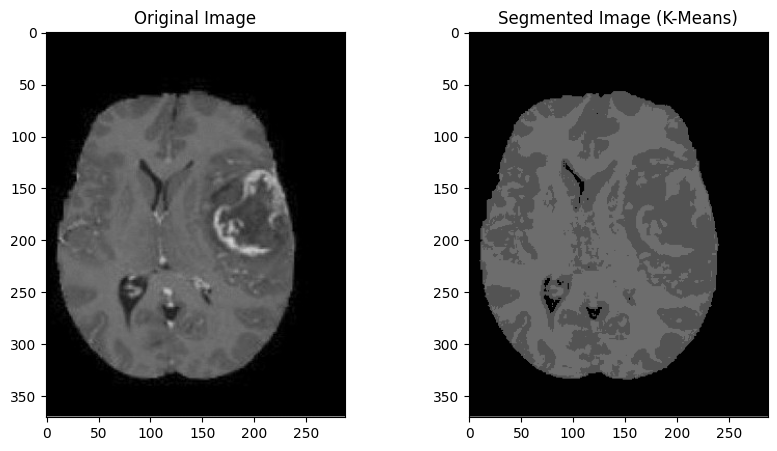

In [13]:
# Figure ka size set kar rahe hain (10x5 inches)
plt.figure(figsize=(10,5))

# Pehli subplot me original image dikhayenge
plt.subplot(1,2,1)  # 1 row, 2 columns, pehli position
plt.imshow(image)  # Original image display kar rahe hain
plt.title("Original Image")  # Title set kar rahe hain

# Dusri subplot me segmented image dikhayenge
plt.subplot(1,2,2)  # 1 row, 2 columns, dusri position
plt.imshow(segmented_image)  # K-Means clustered image display kar rahe hain
plt.title("Segmented Image (K-Means)")  # Title set kar rahe hain

# Final output display kar rahe hain
plt.show()
